**Proyecto final Curso de Matemáticas para Data Science: Probabilidad - Platzi**

Se presenta el desarrollo del estudio de funciones de probabilidad con Python y la prueba de hipotesis A|B para un problema estadistico relacionado con una pagina web.

Los datos y guia de desarrollo pueden consultarse en: AB Testing en Python: Tutorial sobre pruebas de hipotesis | Analisis datos y Visual Searborn Scipy https://www.youtube.com/watch?v=BakFbysF6aM

# Importacion de librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt


# Lectura y ajuste de los datos de trafico Web

In [2]:
df = pd.read_csv("/content/data (1).csv")
df.head(10)

,Day,Conversion_A,Conversion_B
0,1,0.15,0.19
1,2,0.12,0.20
2,3,0.18,0.18
3,4,0.19,0.22
4,5,0.17,0.19
5,6,0.13,0.17
6,7,0.14,0.18
7,8,0.23,0.20
8,9,0.11,0.17
9,10,0.15,0.22


In [3]:
#Exploracion del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Day           30 non-null     int64  
 1   Conversion_A  30 non-null     float64
 2   Conversion_B  30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [4]:
df.shape

(30, 3)

In [5]:
# Ajuste del dataset
data = df.drop(columns=['Day'],axis=1)
data.head(10)

,Conversion_A,Conversion_B
0,0.15,0.19
1,0.12,0.20
2,0.18,0.18
3,0.19,0.22
4,0.17,0.19
5,0.13,0.17
6,0.14,0.18
7,0.23,0.20
8,0.11,0.17
9,0.15,0.22


In [6]:
# Estadistica descritiva
data.describe()

,Conversion_A,Conversion_B
count,30.000000,30.000000
mean,0.162000,0.193333
std,0.036141,0.027334
min,0.100000,0.150000
25%,0.132500,0.180000
50%,0.165000,0.190000
75%,0.187500,0.200000
max,0.230000,0.270000


# Analisis de correlacion de las variables del dataset y exploracion en el ajuste de funciones de probabilidad

In [7]:
np.corrcoef(data['Conversion_A'], data['Conversion_B'])

array([[1.        , 0.31764378],
       [0.31764378, 1.        ]])

In [8]:
data.corr('pearson')

,Conversion_A,Conversion_B
Conversion_A,1.000000,0.317644
Conversion_B,0.317644,1.000000


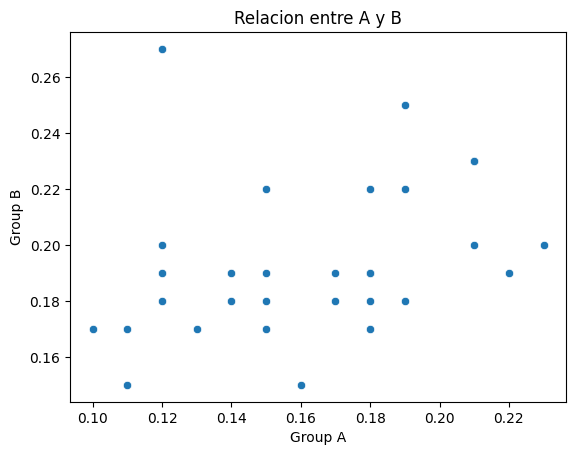

In [9]:
sns.scatterplot(data=data, x=data['Conversion_A'], y=data['Conversion_B'])
plt.xlabel("Group A")
plt.ylabel("Group B")
plt.title("Relacion entre A y B")
plt.show()

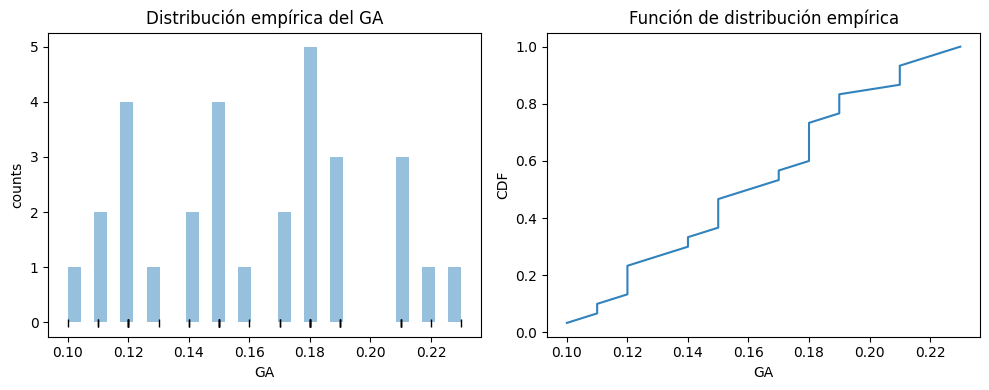

In [10]:
# https://cienciadedatos.net/documentos/pystats01-ajuste-distribuciones-python

from scipy import stats
import inspect
from statsmodels.distributions.empirical_distribution import ECDF

datos = data['Conversion_A']
datos

# Gráficos distribución observada (empírica)
# ==============================================================================
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Histograma
axs[0].hist(x=datos, bins=30, color="#3182bd", alpha=0.5)
axs[0].plot(datos, np.full_like(datos, -0.01), '|k', markeredgewidth=1)
axs[0].set_title('Distribución empírica del GA')
axs[0].set_xlabel('GA')
axs[0].set_ylabel('counts')

# Función de Distribución Acumulada
# ecdf (empirical cumulative distribution function)
ecdf = ECDF(x=datos)
axs[1].plot(ecdf.x, ecdf.y, color="#3182bd")
axs[1].set_title('Función de distribución empírica')
axs[1].set_xlabel('GA')
axs[1].set_ylabel('CDF')

plt.tight_layout();

---------------------
Resultados del ajuste
---------------------
Distribución:   norm
Dominio:        [-inf, inf]
Parámetros:     {'loc': 0.162, 'scale': 0.03553402125663047}
Log likelihood: 57.54978488875605
AIC:            -111.0995697775121
BIC:            -108.29717501418779


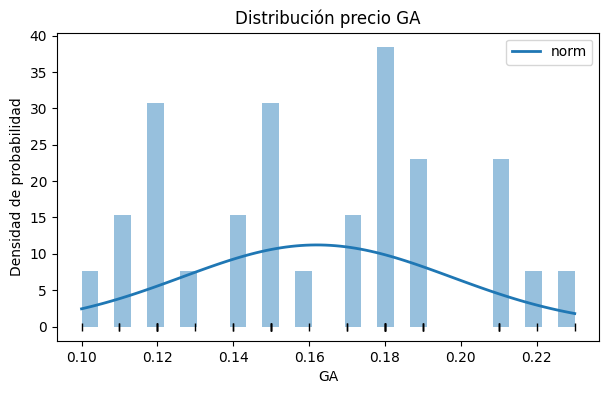

In [11]:
# https://cienciadedatos.net/documentos/pystats01-ajuste-distribuciones-python

# Ajuste distribución normal
#===============================================================================
# 1) Se define el tipo de distribución
distribucion = stats.norm

# 2) Con el método fit() se obtienen los parámetros
parametros = distribucion.fit(data=datos)

# 3) Se crea un diccionario que incluya el nombre de cada parámetro
nombre_parametros = [p for p in inspect.signature(distribucion._pdf).parameters \
                     if not p=='x'] + ["loc","scale"]
parametros_dict = dict(zip(nombre_parametros, parametros))

# 3) Se calcula el log likelihood
log_likelihood = distribucion.logpdf(datos.to_numpy(), *parametros).sum()

# 4) Se calcula el AIC y el BIC
aic = -2 * log_likelihood + 2 * len(parametros)
bic = -2 * log_likelihood + np.log(datos.shape[0]) * len(parametros)

# 5) Gráfico
x_hat = np.linspace(min(datos), max(datos), num=100)
y_hat = distribucion.pdf(x_hat, *parametros)
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label=distribucion.name)
ax.hist(x=datos, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(datos, np.full_like(datos, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución precio GA')
ax.set_xlabel('GA')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

#6) Información del ajuste
print('---------------------')
print('Resultados del ajuste')
print('---------------------')
print(f"Distribución:   {distribucion.name}")
print(f"Dominio:        {[distribucion.a, distribucion.b]}")
print(f"Parámetros:     {parametros_dict}")
print(f"Log likelihood: {log_likelihood}")
print(f"AIC:            {aic}")
print(f"BIC:            {bic}")

---------------------
Resultados del ajuste
---------------------
Distribución:   gamma
Dominio:        [0.0, inf]
Parámetros:     {'a': 1613.2637918334995, 'loc': -1.265168623768354, 'scale': 0.0008846406567520222}
Log likelihood: 57.55956656970535
AIC:            -109.1191331394107
BIC:            -104.91554099442425


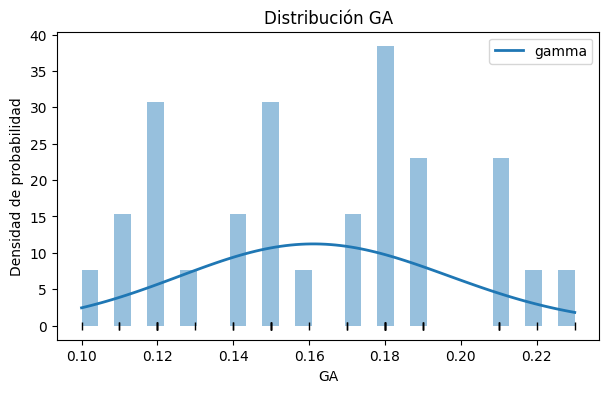

In [12]:
# https://cienciadedatos.net/documentos/pystats01-ajuste-distribuciones-python

# Ajuste distribución normal
#===============================================================================
# 1) Se define el tipo de distribución
distribucion = stats.gamma

# 2) Con el método fit() se obtienen los parámetros
parametros = distribucion.fit(data=datos)

# 3) Se crea un diccionario que incluya el nombre de cada parámetro
nombre_parametros = [p for p in inspect.signature(distribucion._pdf).parameters \
                     if not p=='x'] + ["loc","scale"]
parametros_dict = dict(zip(nombre_parametros, parametros))

# 3) Se calcula el log likelihood
log_likelihood = distribucion.logpdf(datos.to_numpy(), *parametros).sum()

# 4) Se calcula el AIC y el BIC
aic = -2 * log_likelihood + 2 * len(parametros)
bic = -2 * log_likelihood + np.log(datos.shape[0]) * len(parametros)

# 5) Gráfico
x_hat = np.linspace(min(datos), max(datos), num=100)
y_hat = distribucion.pdf(x_hat, *parametros)
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label=distribucion.name)
ax.hist(x=datos, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(datos, np.full_like(datos, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución GA')
ax.set_xlabel('GA')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

#6) Información del ajuste
print('---------------------')
print('Resultados del ajuste')
print('---------------------')
print(f"Distribución:   {distribucion.name}")
print(f"Dominio:        {[distribucion.a, distribucion.b]}")
print(f"Parámetros:     {parametros_dict}")
print(f"Log likelihood: {log_likelihood}")
print(f"AIC:            {aic}")
print(f"BIC:            {bic}")

In [13]:
from scipy.stats import spearmanr
coef, p = spearmanr(data['Conversion_A'],data['Conversion_B'])
print('Coeficiente de correlacion de Spearman: %.3f' % coef)
alpha = 0.05
if p > alpha:
  print("Las pruebas no estan relacionadas (fallo en rechazar la hipotesis) %.3f" % p)
else:
  print("Las pruebas estan relacionadas (rechaza la hipotesis) %.3f" % p)

Coeficiente de correlacion de Spearman: 0.461
Las pruebas estan relacionadas (rechaza la hipotesis) 0.010


In [14]:
#data.corr('spearman')

# Visualizacion de los datos

<ipython-input-15-3c515211f4a6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Conversion_A,ax=axs[0],label="Group A",kde=True)
<ipython-input-15-3c515211f4a6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Conversion_B,ax=axs[1],label="Group B",kde=True)


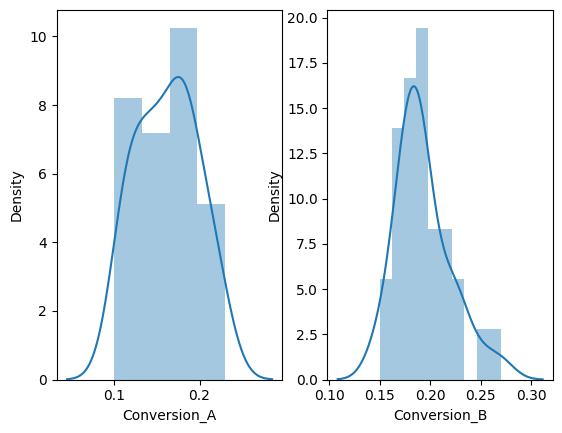

In [15]:
fig, axs = plt.subplots(ncols=2)
sns.distplot(data.Conversion_A,ax=axs[0],label="Group A",kde=True)
sns.distplot(data.Conversion_B,ax=axs[1],label="Group B",kde=True)
plt.show()

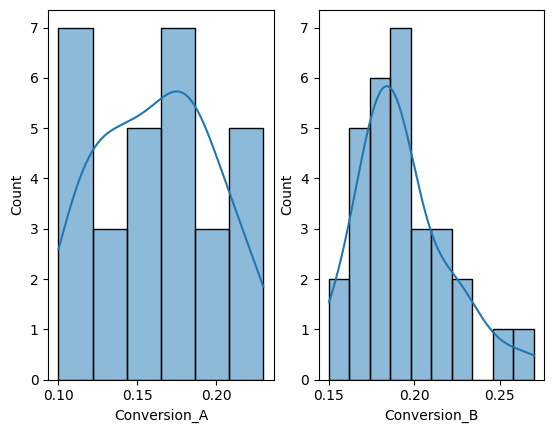

In [16]:
fig, axs = plt.subplots(ncols=2)
sns.histplot(data.Conversion_A,ax=axs[0],label="Group A",kde=True)
sns.histplot(data.Conversion_B,ax=axs[1],label="Group B",kde=True)
plt.show()

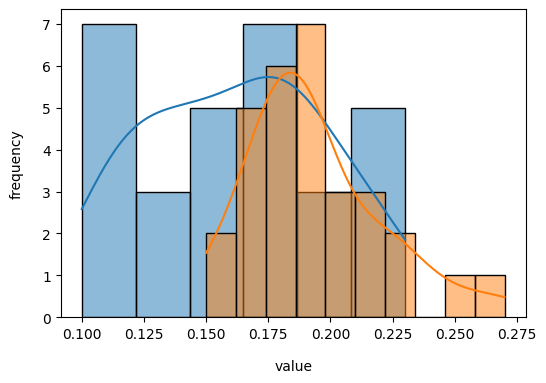

In [17]:
plt.figure(figsize=(6,4))
sns.histplot(data, x=data['Conversion_A'],label='A',kde=True)
sns.histplot(data, x=data['Conversion_B'],label='B',kde=True)
plt.xlabel("value", labelpad=13)
plt.ylabel("frequency", labelpad=13)
plt.show()

# Prueba de hipotesis A|B

In [21]:
from scipy.stats import levene
levene(data.Conversion_B,data.Conversion_A)

LeveneResult(statistic=5.392311404214254, pvalue=0.023757520229066957)

In [22]:
t_stat, p_val = ss.ttest_ind(data.Conversion_B,data.Conversion_A,equal_var=False)
t_stat, p_val

(3.78736793091929, 0.00038453573945864804)

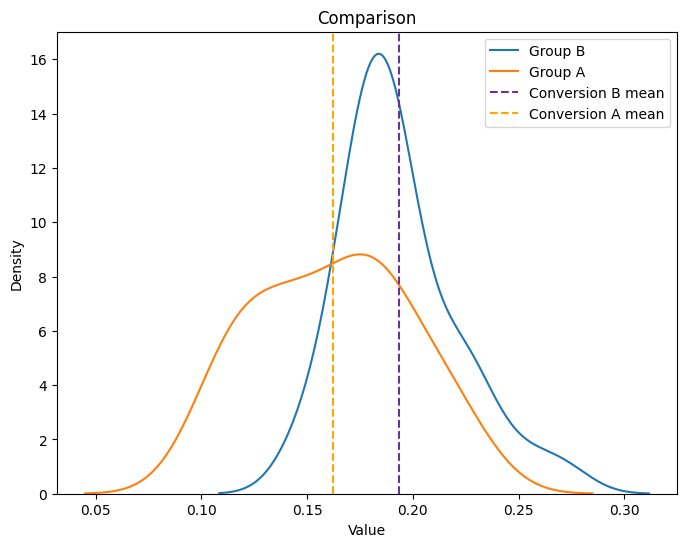

In [23]:
plt.figure(figsize=(8,6))
sns.kdeplot(data.Conversion_B, label="Group B")
sns.kdeplot(data.Conversion_A, label="Group A")
plt.xlabel("Value")
plt.axvline(x=data.Conversion_B.mean(), color='rebeccapurple', linestyle='--', label='Conversion B mean')
plt.axvline(x=data.Conversion_A.mean(), color='orange', linestyle='--', label='Conversion A mean')
plt.title("Comparison")
plt.legend()
plt.show()


 Este proyecto y los ejemplos fueron desarrollados por Victor Jose Olivero Ortiz.

 Enero, 2024

https://github.com/volivero?tab=repositories
